# Project Model B 
Desrciption of this model: Adding new variables to the model, (month, season, holiday, etc)

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm

In [28]:
# Reading the file 
train = pd.read_csv('Hotel Reservations.csv')
train

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


**1. Adding seasons**

Spring runs from March 1 to May 31

Summer runs from June 1 to August 31

Fall runs from September 1 to November 30

Winter runs from December 1 to February 28 (February 29 in a leap year)

In [29]:
# Function to add seasons 
#Creating a function to bin age so that it can be applied to both the test and train datasets
def add_seasons(data):
    data['seasons'] = data['arrival_month'].apply(lambda x: 'spring' if (x == 3 or x ==4 or x ==5) 
                                                else ('winter' if (x == 12 or x ==1 or x ==2)
                                                      else ('summer' if (x == 6 or x ==7 or x == 8)
                                                            else 'fall')))
    return data

add_seasons(train)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,seasons
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled,fall
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled,fall
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled,winter
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled,spring
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled,spring
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled,summer
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled,fall
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled,summer
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled,spring


**2. Adding holidays**

New_years: December 31st *(guests arrive either 29, 30, 31 of dec)*

Christmas: December 25th   *(guests arrive either 23, 24, 25 of dec)*

Independence: July 4th *(guests arrive either 2, 3, 4 of july)*

Thanksgiving Day: November 23 2017 and November 22 2018


In [36]:
train['holiday'] = None

In [40]:
# Adding New Years 
new_years = train.loc[(train['arrival_month'] == 12) & ((train['arrival_date'] == 29) | (train['arrival_date'] == 30) | (train['arrival_date'] == 31))]
#print(new_years.index)

for ind in new_years.index:
    train.at[ind, 'holiday'] = 'new_year'
train.value_counts(subset=['holiday'], ascending=True)
check = train.loc[train['holiday'] == 'new_year']
check.shape
train

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,...,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,seasons,holiday
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,...,2,Offline,0,0,0,65.00,0,Not_Canceled,fall,None
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,...,6,Online,0,0,0,106.68,1,Not_Canceled,fall,None
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,...,28,Online,0,0,0,60.00,0,Canceled,winter,None
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,...,20,Online,0,0,0,100.00,0,Canceled,spring,None
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,...,11,Online,0,0,0,94.50,0,Canceled,spring,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,...,3,Online,0,0,0,167.80,1,Not_Canceled,summer,None
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,...,17,Online,0,0,0,90.95,2,Canceled,fall,None
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,...,1,Online,0,0,0,98.39,2,Not_Canceled,summer,None
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,...,21,Online,0,0,0,94.50,0,Canceled,spring,None


In [32]:
# Adding Christmas
christmas = train.loc[(train['arrival_month'] == 12) & ((train['arrival_date'] == 23) | (train['arrival_date'] == 24) | (train['arrival_date'] == 25))]
#print(christmas.index)

for ind in christmas.index:
    train.at[ind, 'holiday'] = 'christmas'
#train.value_counts(subset=['holiday'], ascending=True)
#check = train.loc[train['holiday'] == 'christmas']
#check.shape

In [33]:
# Adding Independence Day
independence = train.loc[(train['arrival_month'] == 7) & ((train['arrival_date'] == 2) | (train['arrival_date'] == 3) | (train['arrival_date'] == 4))]
#print(independence.index)

for ind in independence.index:
    train.at[ind, 'holiday'] = 'independence'
#train.value_counts(subset=['holiday'], ascending=True)
#check = train.loc[train['holiday'] == 'independence']
#check.shape

In [34]:
# Adding Thanksgiving day 
thanksgiving = train.loc[(train['arrival_month'] == 11) & ((train['arrival_date'] == 20) | (train['arrival_date'] == 21) | (train['arrival_date'] == 22) | (train['arrival_date'] == 23))]
#print(thanksgiving.index)

for ind in thanksgiving.index:
    train.at[ind, 'holiday'] = 'thanksgiving'
#train.value_counts(subset=['holiday'], ascending=True)
#check = train.loc[train['holiday'] == 'thanksgiving']
#check.shape

In [35]:
train

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,...,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,seasons,holiday
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,...,2,Offline,0,0,0,65.00,0,Not_Canceled,fall,None
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,...,6,Online,0,0,0,106.68,1,Not_Canceled,fall,None
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,...,28,Online,0,0,0,60.00,0,Canceled,winter,None
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,...,20,Online,0,0,0,100.00,0,Canceled,spring,None
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,...,11,Online,0,0,0,94.50,0,Canceled,spring,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,...,3,Online,0,0,0,167.80,1,Not_Canceled,summer,None
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,...,17,Online,0,0,0,90.95,2,Canceled,fall,None
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,...,1,Online,0,0,0,98.39,2,Not_Canceled,summer,None
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,...,21,Online,0,0,0,94.50,0,Canceled,spring,None


**3. Creating training and testing dataframes based on years**


In [9]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(train, test_size=0.25, random_state=25, shuffle=True)

Cells below are a previous approach to making test and train data which were not as efficient.

Ignore: 

training data: includes months 7,8,9,10,11,12 of 2017, and 1,2,3,4,5,6,7 of 2018

testing data: includes months 8,9,10,11,12 of 2018

In [10]:
# Looking at the arrival year and arrival month, to split the data set
#train.value_counts(subset=['arrival_year', 'arrival_month'], ascending=True)

In [11]:
#new_train = train.loc[(train['arrival_month'] <= 7) | (train['arrival_year'] == 2017)]
#test = train.loc[(train['arrival_month'] > 7) & (train['arrival_year'] == 2018)]

In [12]:
#new_train.value_counts(subset=['arrival_year', 'arrival_month'], ascending=True)

In [13]:
#test.value_counts(subset=['arrival_year', 'arrival_month'], ascending=True)

In [14]:
#train = new_train

**4. EDA**

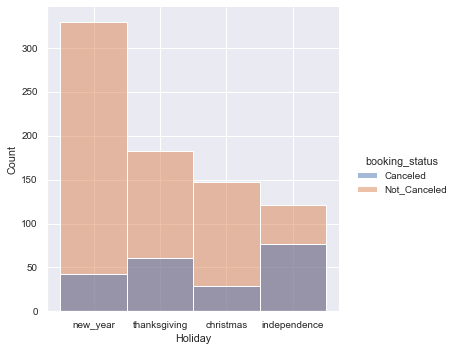

In [15]:
sns.set(font_scale = .9)
a = sns.displot(data = train, x = 'holiday',kind = 'hist', hue = 'booking_status')
a.set_axis_labels("Holiday", "Count")
a.set_titles("{col_name}")

In [21]:
observations = (train['holiday'].value_counts()/train['holiday'].value_counts().sum())*100

In [23]:
df = pd.DataFrame({'holiday': observations.index, '% observations': observations.values})
df

,holiday,% observations
0,new_year,37.638749
1,thanksgiving,24.621594
2,independence,19.979818
3,christmas,17.759839


In [47]:
new_year_no = train.loc[(train.holiday == 'new_year') & (train.booking_status == 'Not_Canceled')]
new_year_yes = train.loc[(train.holiday == 'new_year') & (train.booking_status == 'Canceled')]

cancel_p = (new_year_yes.shape[0] / (new_year_no.shape[0] + new_year_yes.shape[0]))*100
print('Percentage of cancellations in new_year: ' +   str(cancel_p) + '%' )

Percentage of cancellations in new_year: 11.506276150627615%


In [49]:
thanksgiving_no = train.loc[(train.holiday == 'thanksgiving') & (train.booking_status == 'Not_Canceled')]
thanksgiving_yes = train.loc[(train.holiday == 'thanksgiving') & (train.booking_status == 'Canceled')]

cancel_p =  (thanksgiving_yes.shape[0] / (thanksgiving_no.shape[0] + thanksgiving_yes.shape[0]))*100
print('Percentage of cancellations in thanksgiving: ' +  str(cancel_p) + '%' )

ZeroDivisionError: division by zero

In [19]:
christmas_no = train.loc[(train.holiday == 'christmas') & (train.booking_status == 'Not_Canceled')]
christmas_yes = train.loc[(train.holiday == 'christmas') & (train.booking_status == 'Canceled')]

(christmas_yes.shape[0] / (christmas_no.shape[0] + christmas_yes.shape[0]))*100

16.477272727272727

In [20]:
independence_no = train.loc[(train.holiday == 'independence') & (train.booking_status == 'Not_Canceled')]
independence_yes = train.loc[(train.holiday == 'independence') & (train.booking_status == 'Canceled')]

(independence_yes.shape[0] / (independence_no.shape[0] + independence_yes.shape[0]))*100

38.88888888888889

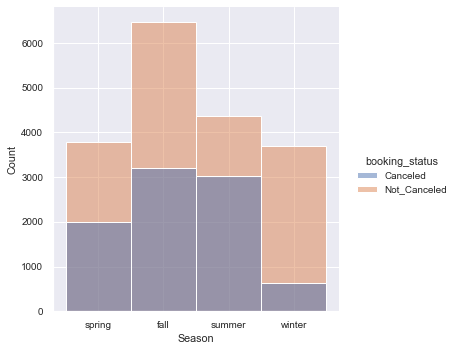

In [21]:
sns.set(font_scale = .9)
a = sns.displot(data = train, x = 'seasons',kind = 'hist', hue = 'booking_status')
a.set_axis_labels("Season", "Count")
a.set_titles("{col_name}")

In [26]:
observations_2 = (train['seasons'].value_counts()/train['seasons'].value_counts().sum())*100

df_2 = pd.DataFrame({'seasons': observations_2.index, '% observations': observations_2.values})
df_2

,seasons,% observations
0,fall,35.606116
1,summer,27.221936
2,spring,21.237962
3,winter,15.933985


In [22]:
summer_no = train.loc[(train.seasons == 'summer') & (train.booking_status == 'Not_Canceled')]
summer_yes = train.loc[(train.seasons == 'summer') & (train.booking_status == 'Canceled')]

(summer_yes.shape[0] / (summer_no.shape[0] + summer_yes.shape[0]))*100

40.98028625438833

In [23]:
fall_no = train.loc[(train.seasons == 'fall') & (train.booking_status == 'Not_Canceled')]
fall_yes = train.loc[(train.seasons == 'fall') & (train.booking_status == 'Canceled')]

(fall_yes.shape[0] / (fall_no.shape[0] + fall_yes.shape[0]))*100

33.126871064312994

In [24]:
winter_no = train.loc[(train.seasons == 'winter') & (train.booking_status == 'Not_Canceled')]
winter_yes = train.loc[(train.seasons == 'winter') & (train.booking_status == 'Canceled')]

(winter_yes.shape[0] / (winter_no.shape[0] + winter_yes.shape[0]))*100

14.53287197231834

In [25]:
spring_no = train.loc[(train.seasons == 'spring') & (train.booking_status == 'Not_Canceled')]
spring_yes = train.loc[(train.seasons == 'spring') & (train.booking_status == 'Canceled')]

(spring_yes.shape[0] / (spring_no.shape[0] + spring_yes.shape[0]))*100

34.406368985808236

<AxesSubplot:>

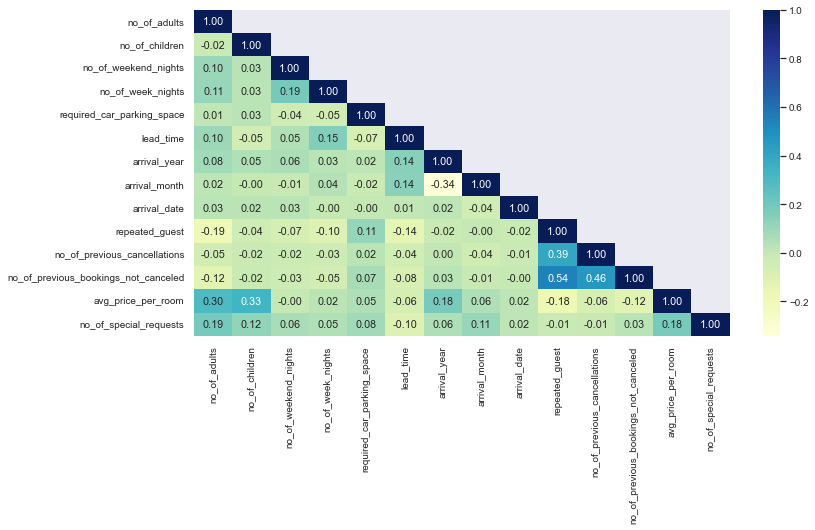

In [26]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.heatmap(train.corr(), fmt='.2f', cmap="YlGnBu", annot=True, mask=np.triu(train.corr(),+1))

**5. Model 1: Including All Predictors (not new variables yet)**

In [27]:
#Function to compute confusion matrix and prediction accuracy on test/train data
from sklearn.metrics import roc_curve, auc

def confusion_matrix_data(data,actual_values,model,cutoff=0.5):
#Predict the values using the Logit model
    pred_values = model.predict(data)
# Specify the bins
    bins=np.array([0,cutoff,1])
#Confusion matrix
    cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
    cm_df = pd.DataFrame(cm)
    cm_df.columns = ['Predicted 0','Predicted 1']
    cm_df = cm_df.rename(index={0: 'Actual 0',1:'Actual 1'})
# Calculate the accuracy
    accuracy = (cm[0,0]+cm[1,1])/cm.sum()
    fnr = (cm[1,0])/(cm[1,0]+cm[1,1])
    precision = (cm[1,1])/(cm[0,1]+cm[1,1])
    fpr = (cm[0,1])/(cm[0,0]+cm[0,1])
    tpr = (cm[1,1])/(cm[1,0]+cm[1,1])
    fpr_roc, tpr_roc, auc_thresholds = roc_curve(actual_values, pred_values)
    auc_value = (auc(fpr_roc, tpr_roc))# AUC of ROC
    sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
    plt.ylabel("Actual Values")
    plt.xlabel("Predicted Values")
    print("Classification accuracy = {:.1%}".format(accuracy))
    print("Precision = {:.1%}".format(precision))
    print("TPR or Recall = {:.1%}".format(tpr))
    print("FNR = {:.1%}".format(fnr))
    print("FPR = {:.1%}".format(fpr))
    print("ROC-AUC = {:.1%}".format(auc_value))

In [28]:
train['booking_status'] = train['booking_status'].map({'Canceled': 1, 'Not_Canceled': 0})
test['booking_status'] = test['booking_status'].map({'Canceled': 1, 'Not_Canceled': 0})

In [29]:
logit_model = sm.logit(formula = 'booking_status ~ no_of_adults + no_of_children  + no_of_weekend_nights + no_of_week_nights + type_of_meal_plan + required_car_parking_space + room_type_reserved +lead_time + arrival_year + arrival_month + arrival_date + market_segment_type +repeated_guest + no_of_previous_cancellations + avg_price_per_room  + no_of_special_requests', data = train).fit()
logit_model.summary()

         Current function value: 0.419594
         Iterations: 35


/Users/elenallaguno/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         booking_status   No. Observations:                27206
Model:                          Logit   Df Residuals:                    27179
Method:                           MLE   Df Model:                           26
Date:                Mon, 06 Mar 2023   Pseudo R-squ.:                  0.3352
Time:                        11:14:53   Log-Likelihood:                -11415.
converged:                      False   LL-Null:                       -17170.
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                             -877.7186    118.426     -7.412      0.000   -1109.830    -645.607
type_of_meal_plan[T.Meal Plan 2]         0.1926      0.065      2.976      0.003       0.066       0.319
type_of_meal_plan[T.Meal Plan 3]         3.1134    6.8e+04   4.58e-05      1.000   -1.33e+05    1.33e+05
type_of_meal_plan[T.Not Selected]        0.2398      0.052      4.643      0.000       0.139       0.341
room_type_reserved[T.Room_Type 2]       -0.3554      0.129     -2.761      0.006      -0.608      -0.103
room_type_reserved[T.Room_Type 3]        0.7176      1.694      0.424      0.672      -2.602       4.038
room_type_reserved[T.Room_Type 4]       -0.2793      0.052     -5.376      0.000      -0.381      -0.177
room_type_reserved[T.Room_Type 5]       -0.8359      0.199     -4.196      0.000      -1.226      -0.445
room_type_reserved[T.Room_Type 6]       -1.0172      0.148     -6.888      0.000      -1.307      -0.728
room_type_reserved[T.Room_Type 7]       -1.3899      0.295     -4.711      0.000      -1.968      -0.812
market_segment_type[T.Complementary]   -21.7809   7164.613     -0.003      0.998   -1.41e+04     1.4e+04
market_segment_type[T.Corporate]        -0.9676      0.253     -3.823      0.000      -1.464      -0.472
market_segment_type[T.Offline]          -1.9731      0.242     -8.138      0.000      -2.448      -1.498
market_segment_type[T.Online]           -0.1650      0.239     -0.690      0.490      -0.634       0.304
no_of_adults                             0.0938      0.037      2.562      0.010       0.022       0.166
no_of_children                           0.1359      0.057      2.373      0.018       0.024       0.248
no_of_weekend_nights                     0.1236      0.019      6.426      0.000       0.086       0.161
no_of_week_nights                        0.0429      0.012      3.609      0.000       0.020       0.066
required_car_parking_space              -1.7322      0.141    -12.284      0.000      -2.009      -1.456
lead_time                                0.0158      0.000     60.951      0.000       0.015       0.016
arrival_year                             0.4336      0.059      7.389      0.000       0.319       0.549
arrival_month                           -0.0439      0.006     -6.942      0.000      -0.056      -0.031
arrival_date                          8.936e-05      0.002      0.047      0.962      -0.004       0.004
repeated_guest                          -2.2789      0.445     -5.121      0.000      -3.151      -1.407
no_of_previous_cancellations             0.2078      0.065      3.195      0.001       0.080       0.335
avg_price_per_room                       0.0195      0.001     27.164      0.000       0.018       0.021
no_of_special_requests                  -1.5187      0.030    -51.390      0.000      -1.577      -1.461
===========================================================================================

test Confusion Matrix and Statistics:
Classification accuracy = 80.1%
Precision = 72.2%
TPR or Recall = 65.6%
FNR = 34.4%
FPR = 12.7%
ROC-AUC = 85.5%


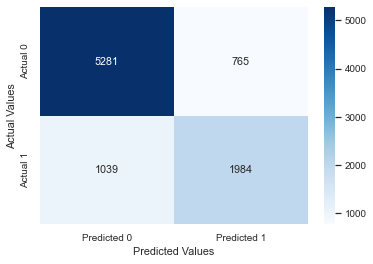

In [30]:
print("test Confusion Matrix and Statistics:")
confusion_matrix_data(test,test.booking_status, logit_model,0.45)

**6. Model 2: Including All Predictors with season variable**

In [31]:
logit_model_2 = sm.logit(formula = 'booking_status ~ no_of_adults + no_of_children  + no_of_weekend_nights + no_of_week_nights + type_of_meal_plan + required_car_parking_space + room_type_reserved +lead_time  + market_segment_type +repeated_guest + no_of_previous_cancellations + avg_price_per_room  + no_of_special_requests + seasons ', data = train).fit()
logit_model_2.summary()

         Current function value: 0.419233
         Iterations: 35


/Users/elenallaguno/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         booking_status   No. Observations:                27206
Model:                          Logit   Df Residuals:                    27179
Method:                           MLE   Df Model:                           26
Date:                Mon, 06 Mar 2023   Pseudo R-squ.:                  0.3357
Time:                        11:14:54   Log-Likelihood:                -11406.
converged:                      False   LL-Null:                       -17170.
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                               -2.9242      0.249    -11.727      0.000      -3.413      -2.435
type_of_meal_plan[T.Meal Plan 2]         0.1145      0.061      1.862      0.063      -0.006       0.235
type_of_meal_plan[T.Meal Plan 3]         2.9928   5.43e+04   5.51e-05      1.000   -1.06e+05    1.06e+05
type_of_meal_plan[T.Not Selected]        0.2641      0.051      5.159      0.000       0.164       0.364
room_type_reserved[T.Room_Type 2]       -0.2940      0.130     -2.259      0.024      -0.549      -0.039
room_type_reserved[T.Room_Type 3]        0.5184      1.581      0.328      0.743      -2.580       3.616
room_type_reserved[T.Room_Type 4]       -0.2179      0.052     -4.213      0.000      -0.319      -0.117
room_type_reserved[T.Room_Type 5]       -0.7875      0.201     -3.912      0.000      -1.182      -0.393
room_type_reserved[T.Room_Type 6]       -0.9307      0.147     -6.336      0.000      -1.219      -0.643
room_type_reserved[T.Room_Type 7]       -1.2351      0.297     -4.159      0.000      -1.817      -0.653
market_segment_type[T.Complementary]   -21.3366   5793.902     -0.004      0.997   -1.14e+04    1.13e+04
market_segment_type[T.Corporate]        -0.8562      0.253     -3.389      0.001      -1.351      -0.361
market_segment_type[T.Offline]          -1.9121      0.242     -7.904      0.000      -2.386      -1.438
market_segment_type[T.Online]           -0.0333      0.239     -0.139      0.889      -0.502       0.435
seasons[T.spring]                        0.1025      0.045      2.275      0.023       0.014       0.191
seasons[T.summer]                       -0.0440      0.042     -1.053      0.293      -0.126       0.038
seasons[T.winter]                       -0.7177      0.062    -11.523      0.000      -0.840      -0.596
no_of_adults                             0.1037      0.037      2.812      0.005       0.031       0.176
no_of_children                           0.1975      0.057      3.469      0.001       0.086       0.309
no_of_weekend_nights                     0.1277      0.019      6.616      0.000       0.090       0.166
no_of_week_nights                        0.0478      0.012      3.992      0.000       0.024       0.071
required_car_parking_space              -1.6931      0.141    -11.998      0.000      -1.970      -1.417
lead_time                                0.0156      0.000     62.265      0.000       0.015       0.016
repeated_guest                          -2.3253      0.446     -5.210      0.000      -3.200      -1.451
no_of_previous_cancellations             0.2563      0.070      3.647      0.000       0.119       0.394
avg_price_per_room                       0.0175      0.001     24.550      0.000       0.016       0.019
no_of_special_requests                  -1.5357      0.030    -51.960      0.000      -1.594      -1.478
===========================================================================================

test Confusion Matrix and Statistics:
Classification accuracy = 80.0%
Precision = 71.7%
TPR or Recall = 66.2%
FNR = 33.8%
FPR = 13.1%
ROC-AUC = 85.6%


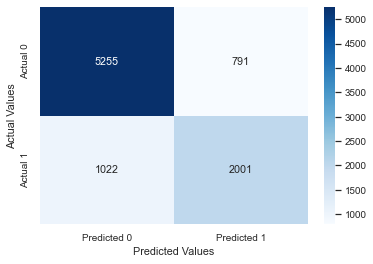

In [32]:
print("test Confusion Matrix and Statistics:")
confusion_matrix_data(test,test.booking_status, logit_model_2, 0.45)

In [33]:
logit_model_3 = sm.logit(formula = 'booking_status ~ no_of_adults + no_of_children  + no_of_weekend_nights + no_of_week_nights + type_of_meal_plan + required_car_parking_space + room_type_reserved +lead_time  + market_segment_type +repeated_guest + no_of_previous_cancellations + avg_price_per_room  + no_of_special_requests ', data = train).fit()


         Current function value: 0.422758
         Iterations: 35


/Users/elenallaguno/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


test Confusion Matrix and Statistics:
Classification accuracy = 76.1%
Precision = 61.0%
TPR or Recall = 77.9%
FNR = 22.1%
FPR = 24.9%
ROC-AUC = 85.4%


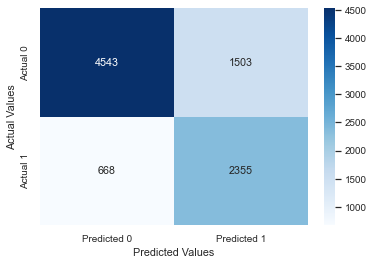

In [34]:
print("test Confusion Matrix and Statistics:")
confusion_matrix_data(test,test.booking_status, logit_model_3, 0.29)

In [35]:
final_model_with_new = sm.logit(formula = 'booking_status ~ no_of_adults + no_of_weekend_nights + no_of_week_nights +required_car_parking_space +lead_time +repeated_guest + no_of_previous_cancellations + avg_price_per_room  + no_of_special_requests + seasons ', data = train).fit()


Optimization terminated successfully.
         Current function value: 0.458371
         Iterations 9


test Confusion Matrix and Statistics:
Classification accuracy = 77.6%
Precision = 68.9%
TPR or Recall = 59.8%
FNR = 40.2%
FPR = 13.5%
ROC-AUC = 82.3%


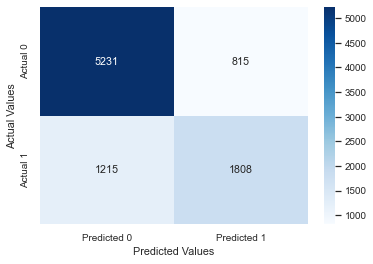

In [36]:
print("test Confusion Matrix and Statistics:")
confusion_matrix_data(test,test.booking_status, final_model_with_new, 0.45)

In [39]:
final_model = sm.logit(formula = 'booking_status ~ no_of_adults + no_of_weekend_nights + no_of_week_nights +required_car_parking_space + lead_time +repeated_guest + no_of_previous_cancellations + avg_price_per_room  + no_of_special_requests + arrival_month + arrival_year ', data = train).fit()


/Users/elenallaguno/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


ValueError: array must not contain infs or NaNs

test Confusion Matrix and Statistics:
Classification accuracy = 77.6%
Precision = 69.4%
TPR or Recall = 58.6%
FNR = 41.4%
FPR = 12.9%
ROC-AUC = 82.8%


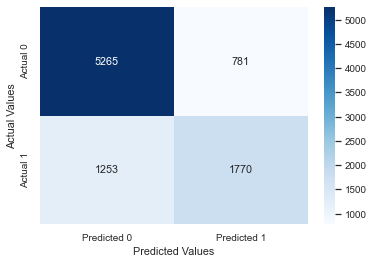

In [38]:
print("test Confusion Matrix and Statistics:")
confusion_matrix_data(test,test.booking_status, final_model, 0.45)